In [1]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

Documentation: We worked through a few examples in class and I checked over my answers with the solutions notebooks before GR3. 

## Lesson 32: Likelihood Ratio Tests

Last time, we introduced Likelihood Ratio tests. Recall that the point of a likelihood ratio test is to compare the likelihood function under a hypothesized value of the parameter with the liklihood function at its maximum. Instead of looking at the ratio $\Lambda$ itself, we often consider $-2\log \Lambda$ instead, since it has a handy distribution. 

### Example 1: Exponential Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the exponential distribution with unknown parameter $\lambda$. Recall that the maximum likelihood estimate of $\lambda$ is $1\over\bar{X}$. We collect a random sample of size 20 and want to test the hypothesis $H_0: \lambda = 3$ vs $H_1: \lambda \neq 3$. Using the data in the python box below, conduct a likelihood ratio test on this hypothesis.  

In [2]:
my_data=np.array([0.18,0.277,0.105,0.126,0.225,0.026,0.123,0.423,0.006,0.281,0.050,0.692,0.105,0.275,0.346,0.079,0.045,0.222,0.063,0.281])

In [3]:
1/np.mean(my_data)

5.089058524173028

In [4]:
stats.describe(my_data)

DescribeResult(nobs=20, minmax=(0.006, 0.692), mean=0.1965, variance=0.027176368421052633, skewness=1.3751532772375619, kurtosis=2.0594082496235426)

(array([10.,  5.,  3.,  1.,  1.]),
 array([0.006 , 0.1432, 0.2804, 0.4176, 0.5548, 0.692 ]),
 <a list of 5 Patch objects>)

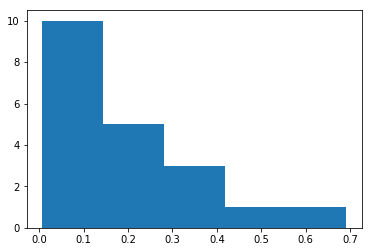

In [5]:
plt.hist(my_data,bins=5)

In [14]:
n=20
lam_ho=3
lam_ha=1/np.mean(my_data)
like_ho=lam_ho**n*np.exp(-lam_ho*np.sum(my_data))
like_ha=lam_ha**n*np.exp(-lam_ha*np.sum(my_data))
ts = -2*log(like_ho/like_ha)
1-stats.chi2.cdf(ts,1)

0.029827229194775096

The p-value is small - near .03, so we would reject the null. 

#### Power

Suppose that the true value of $\lambda$ is 5. Let's determine the power of this test. Let $n=20$. Then determine the power if $n=50$. Remember, power is the probability of correctly rejecting the null hypothesis. 

First, find what value of $-2 \log \Lambda$ would lead you to reject $H_0$. This is sometimes called the critical value. 

In [15]:
crit = stats.chi2.ppf(.95,1) #1 is for one degree of freedom; this tells us where we reject
crit

3.841458820694124

Next, obtain the power. Obtain a sample of size 20 from the true population and obtain the value of $-2\log \Lambda$ for this sample. Repeat many times and determine how often you reject the null hypothesis. 

In [46]:
n=20
tru_lamb=5
lam_ho=3
ts=[]
for i in np.arange(1000):
    val=stats.expon.rvs(scale=1/5,size=n)
    better=-2*log((np.mean(val)**n)*(lam_ho**n)*e**(-lam_ho*sum(val) + n))
    ts=np.append(ts, better)
np.mean(ts>=crit)

0.617

Repeat for a sample size of 50. What do you expect to happen to power? 

In [47]:
n=50
tru_lamb=5
lam_ho=3
ts=[]
for i in np.arange(1000):
    val=stats.expon.rvs(scale=1/5,size=n)
    better=-2*log((np.mean(val)**n)*(lam_ho**n)*e**(-lam_ho*sum(val) + n))
    ts=np.append(ts, better)
np.mean(ts>=crit)

0.951

### A Different Test

We've explored hypothesis tests in this class before. Taking advantage of our computing power, we don't have to rely on test statistics with asymptotic distributions. Let's conduct a more direct hypothesis test using simulation. Recall:

$$
H_0: \lambda = 3
$$

$$
H_1: \lambda \neq 3
$$

Pick a different test statistic. Obtain an empirical distribution of that test statistic under $H_0$. Next, find the $p$-value by determining how often this test statistic is at or further away from the test statistic derived from the sample. Remember that this is a two-sided test. 

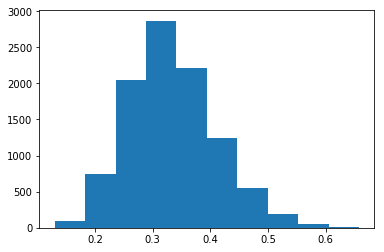

0.03

In [49]:
n=20
ts=[]
for _ in np.arange(10000):
    test= np.mean(stats.expon.rvs(scale=1/3,size=n))
    ts=np.append(ts, test)
np.mean(my_data)
plt.hist(ts)
plt.show()
2*np.mean(ts<=np.mean(my_data))

How did the $p$-value compare to the LRT $p$-value? I wonder how the power of this test compares to our LRT. 

#### Power

Let's figure out the power of this test. First, determine for what values of the test statistic would lead us to reject $H_0$. These values can be referred to as your rejection region. 

In [50]:
#Since it is two-sided, we take both upper and lower percentiles:
upper=percentile(97.5,ts)
lower=percentile(2.5, ts)
print(lower, upper)

0.20544818886561492 0.4996861982907258


Now, determine the power of this test. Like in the LRT case, obtain a sample of size 20 and obtain the test statistic. Repeat many times and see how often your test statistic is in your rejection region. 

In [51]:
n=20
new_ts=[]
for _ in np.arange(10000):
    test= np.mean(stats.expon.rvs(scale=1/5,size=n))
    new_ts=np.append(new_ts, test)

np.mean(new_ts>=upper) + np.mean(new_ts<=lower)

0.5795

Repeat for a sample size of 50. Note that you will have to obtain new critical values in order to do this.  

In [52]:
n=50
ts=[]
for _ in np.arange(10000):
    test= np.mean(stats.expon.rvs(scale=1/3,size=n))
    ts=np.append(ts, test)
lower,upper=percentile([2.5,97.5],ts)
new_ts=[]
for _ in np.arange(10000):
    test= np.mean(stats.expon.rvs(scale=1/5,size=n))
    new_ts=np.append(new_ts, test)

np.mean(new_ts>=upper) + np.mean(new_ts<=lower)


0.9476